JOBSHEET 9
SVM DAN NAÏVE BAYES


1.	Percobaan 1 : Implementasi Support Vector Machine (SVM)

In [122]:
import pandas as pd
 
# Membaca file diabetes.csv
df = pd.read_csv('JOBSHEET/Jobsheet 9/diabetes.csv')


In [123]:
# melihat informasi dataset pada 5 baris pertama
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
# menampilkan info dari tiap kolom
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
X_svc = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y_svc = df['Outcome']


In [126]:
from sklearn.model_selection import train_test_split
 
# memisahkan data untuk training dan testing
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(
    X_svc, y_svc, test_size=0.33, random_state=42)


In [127]:
from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC(C=0.1, gamma=1, kernel='linear')
clf.fit(X_train_svc, y_train_svc)


SVC(C=0.1, gamma=1, kernel='linear')

In [128]:
# Menampilkan skor akurasi prediksi
 
clf.score(X_test_svc, y_test_svc)



0.7559055118110236

2.	Percobaan 2 : Implementasi Support Vector Regression (SVR)

In [129]:
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('JOBSHEET/Jobsheet 9/Salary_Data.csv')


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [131]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [132]:
import numpy as np
 
# memisahkan atribut dan label
X_svr = data[['YearsExperience']]
y_svr = data['Salary']
 
# mengubah bentuk atribut
X_svr = X_svr[:np.newaxis]


In [133]:
from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
model_svr  = SVR(C=1000, gamma=0.05, kernel='rbf')
 
# melatih model dengan fungsi fit
model_svr.fit(X_svr,y_svr)


SVR(C=1000, gamma=0.05)

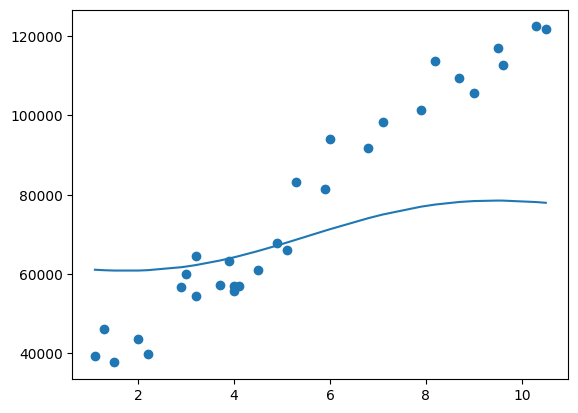

In [134]:
import matplotlib.pyplot as plt
 
# memvisualisasikan model
plt.scatter(X_svr, y_svr)
plt.plot(X_svr, model_svr.predict(X_svr))


3.	Percobaan 3 : Implementasi Naïve Bayes

In [135]:
# load dataset
dataset = pd.read_csv('JOBSHEET/Jobsheet 9/iklan_sosmed.csv', delimiter=';')
dataset.head()


,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             400 non-null    int64 
 1   Jenis_Kelamin  400 non-null    object
 2   Umur           400 non-null    int64 
 3   Gaji           400 non-null    int64 
 4   Transaksi      400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [137]:
X_nb = dataset.iloc[:,2:-1]
y_nb = dataset.iloc[:, -1]

In [138]:
from sklearn.model_selection import train_test_split
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=99)

X_train_nb = X_train_nb.values
y_train_nb = y_train_nb.values
X_test_nb = X_test_nb.values
y_test_nb = y_test_nb.values



In [139]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_nb = sc.fit_transform(X_train_nb)
X_test_nb = sc.transform(X_test_nb)


In [140]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_nb, y_train_nb)


GaussianNB()

In [141]:
# prediksi X_test
y_pred_nb = classifier.predict(X_test_nb)


In [142]:
y_pred_nb

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [143]:
y_test_nb

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [144]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_nb, y_pred_nb)
acc = accuracy_score(y_test_nb, y_pred_nb)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)


Akurasi : 87.5%
Confussion Matrix : 
[[52  4]
 [ 6 18]]


C:\Users\Alfin\AppData\Local\Temp\ipykernel_24760\2479455448.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


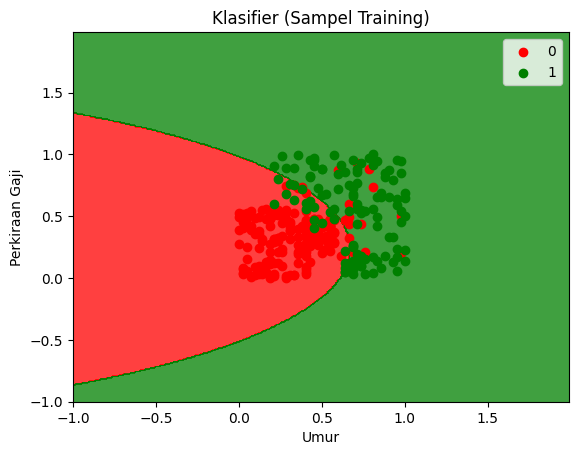

In [145]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_nb, y_train_nb
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()


C:\Users\Alfin\AppData\Local\Temp\ipykernel_24760\3658293761.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


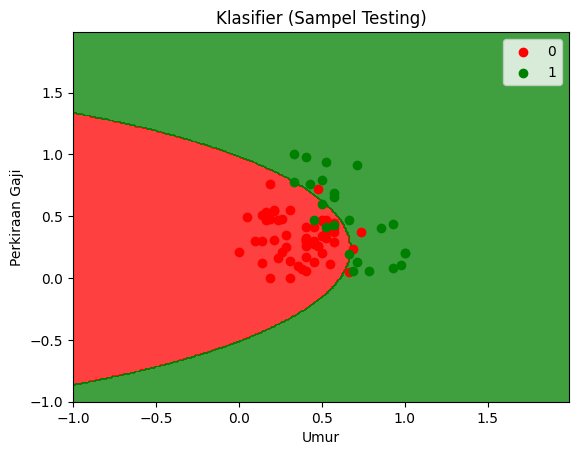

In [146]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_nb, y_test_nb
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Testing)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()


E.	TUGAS PRAKTIKUM

1.	Pada praktikum percobaan 1 dan percobaan 2 yaitu implementasi algoritma SVM dan SVR anda telah mendapatkan nilai akurasi dari model. Carilah parameter pada algoritma SVM dan SVR sampai anda mendapatkan nilai akurasi terbaik dari kedua algoritma tersebut. 
Nb : Anda bisa menggunakan teknik Grid Search


In [147]:
from sklearn.model_selection import GridSearchCV

1. SVM (SVC)

In [148]:
grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svc = SVC()
grid_search_svc = GridSearchCV(svc, grid_svc, cv=3, verbose=2, n_jobs=-1)
grid_search_svc.fit(X_train_svc, y_train_svc)

# Menampilkan parameter terbaik dan skor (bisa berupa akurasi)
print("Best parameters for SVM:", grid_search_svc.best_params_)
print("Best cross-validation accuracy:", grid_search_svc.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation accuracy: 0.774287139036221


2. SVR

In [149]:
from sklearn.model_selection import train_test_split
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, y_svr, test_size=0.2, random_state=15)

In [150]:
grid_svr = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear'],
    'epsilon': [0.1, 0.2, 0.5, 1]
}

grid_search_svr = GridSearchCV(SVR(), grid_svr, cv=5, verbose=2, n_jobs=-1)
grid_search_svr.fit(X_svr, y_svr)

# Menampilkan parameter terbaik dan skor (misalnya R² atau metrik evaluasi lainnya)
print("Best parameters for SVR:", grid_search_svr.best_params_)
print("Best cross-validation score:", grid_search_svr.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters for SVR: {'C': 1000, 'epsilon': 1, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score: 0.027799766500136446


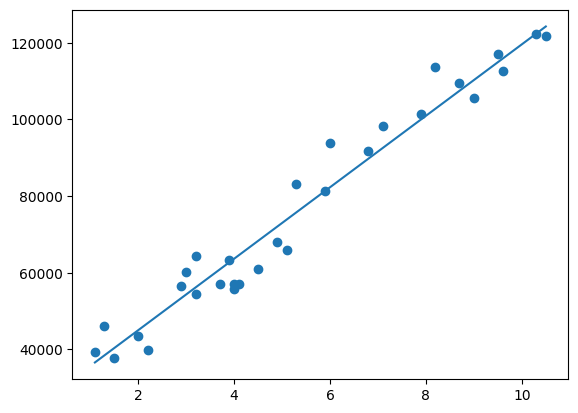

In [151]:
svr_model = SVR(C=1000, epsilon=1, gamma=1, kernel='linear')
model = svr_model.fit(X_svr, y_svr)

plt.scatter(X_svr, y_svr)
plt.plot(X_svr, model.predict(X_svr))

2.	Pada praktikum percobaan 3 yaitu implementasi algoritma Naïve Bayes anda telah mendapatkan nilai akurasi yang cukup tinggi, namun hasil akurasi tersebut masih dapat ditinggkatkan menggunakan hyperparameter tunning. Carilah parameter pada algoritma Naïve Bayes sampai anda mendapatkan nilai akurasi yang lebih tinggi daripada nilai akurasi pada percobaan.

In [152]:
# Mendefinisikan grid parameter untuk tuning var_smoothing
param_grid_nb = {
    'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None, [0.5, 0.5]]  # Misalnya untuk kasus biner, testing dengan prior seimbang
}


gnb = GaussianNB()
grid_search_nb = GridSearchCV(gnb, param_grid_nb, cv=5, verbose=2, n_jobs=-1)
grid_search_nb.fit(X_train_nb, y_train_nb)

print("Best parameters for GaussianNB:", grid_search_nb.best_params_)
print("Best cross-validation accuracy:", grid_search_nb.best_score_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best parameters for GaussianNB: {'priors': None, 'var_smoothing': 1e-12}
Best cross-validation accuracy: 0.896875


In [153]:
# load dataset
datasett = pd.read_csv('JOBSHEET/Jobsheet 9/iklan_sosmed.csv', delimiter=';')
datasett.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


In [154]:
X_nb = datasett.iloc[:,2:-1]
y_nb = datasett.iloc[:, -1]

In [155]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=99)

X_train_nb = X_train_nb.values
y_train_nb = y_train_nb.values
X_test_nb = X_test_nb.values
y_test_nb = y_test_nb.values

In [156]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_nb = sc.fit_transform(X_train_nb)
X_test_nb = sc.transform(X_test_nb)

In [157]:
classifier = GaussianNB(var_smoothing=1e-12)
classifier.fit(X_train_nb, y_train_nb)

GaussianNB(var_smoothing=1e-12)

In [158]:
y_pred_nb = classifier.predict(X_test_nb)

In [159]:
y_pred_nb

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [160]:
y_test_nb

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [161]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_nb, y_pred_nb)
acc = accuracy_score(y_test_nb, y_pred_nb)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 87.5%
Confussion Matrix : 
[[52  4]
 [ 6 18]]
